<a href="https://colab.research.google.com/github/whicisko/codewars/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy

!pip install --upgrade spacy
!python3 -m spacy download pl_core_news_md

nlp = spacy.load("pl_core_news_md")

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-29 13:21:34.131745: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 13:21:34.131913: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 13:21:34.131945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries.

In [3]:
#linki do wybranych książek, tytuły widoczne w linkach
#celowo zostały wybrane książki z możliwym podobieństwem
books_links = (
    'https://wolnelektury.pl/media/book/txt/balladyna.txt',
    'https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt',
    'https://wolnelektury.pl/media/book/txt/romeo-i-julia.txt',
    'https://wolnelektury.pl/media/book/txt/hamlet.txt',
    'https://wolnelektury.pl/media/book/txt/lalka-tom-pierwszy.txt',
    'https://wolnelektury.pl/media/book/txt/lalka-tom-drugi.txt', #można wnioskować podobieństwo z lalka tom 1
)

In [4]:
import urllib.request

corpus = [urllib.request.urlopen(book_link).read().decode("utf8") 
        for book_link in books_links]

In [5]:
from collections import Counter

def get_tokens_frequency(corpus_fragment):
  #.isalpha = zbudowane wyłącznie z liter
  alpha_only = list(filter(lambda x: x.text.isalpha(), nlp(corpus_fragment)))
  tokens = [word.text for word in alpha_only] #formy występujące
  #tokens = [word.lemma_.lower() for word in alpha_only] #formy podstawowe

  frequency = Counter(tokens)
  return frequency

corpus_tokens_frequency = {link: get_tokens_frequency(corpus[i].lower()) 
                          for i, link in enumerate(books_links)}

In [6]:
for link, tokens_frequency in corpus_tokens_frequency.items():
  print("{} -> {}".format(link, tokens_frequency))

https://wolnelektury.pl/media/book/txt/balladyna.txt -> Counter({'i': 520, 'na': 478, 'w': 462, 'z': 401, 'się': 391, 'nie': 370, 'a': 284, 'balladyna': 274, 'to': 269, 'jak': 232, 'do': 229, 'co': 197, 'ja': 177, 'o': 168, 'ty': 151, 'że': 148, 'za': 134, 'kirkor': 113, 'mi': 110, 'grabiec': 110, 'goplana': 104, 'wdowa': 103, 'niech': 102, 'kostryn': 91, 'pustelnik': 86, 'tak': 82, 'po': 80, 'czy': 76, 'od': 72, 'gdzie': 72, 'skierka': 71, 'mnie': 65, 'mój': 65, 'ach': 65, 'ale': 60, 'bo': 60, 'ci': 59, 'może': 58, 'chochlik': 57, 'ta': 56, 'kanclerz': 56, 'moja': 56, 'alina': 50, 'tu': 50, 'ze': 49, 'wchodzi': 48, 'ją': 48, 'nad': 47, 'więc': 47, 'już': 47, 'będzie': 47, 'ciebie': 46, 'jeśli': 43, 'pod': 42, 'niechaj': 41, 'moje': 40, 'cię': 40, 'teraz': 39, 'ten': 38, 'przez': 38, 'lecz': 38, 'tej': 37, 'będę': 37, 'filon': 36, 'tego': 35, 'przed': 35, 'nim': 34, 'panie': 34, 'kiedy': 33, 'jest': 33, 'by': 33, 'cha': 33, 'ma': 32, 'zamku': 32, 'ona': 32, 'nic': 32, 'malin': 32, 'wsz

In [7]:
def get_tokens_frequency_with_stopwords(corpus_fragment):
  #pobranie stoplisty w języku polskim
  stopwords = urllib.request.urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8")
  stopwords = stopwords.split('\n')
  #.isalpha = zbudowane wyłącznie z liter, na wszelki wypadek wyrzucono także ręcznie słowa mające mniej niż 2 znaki
  alpha_only = list(filter(lambda x: x.text.isalpha() and len(x.text) > 1
                           and x.lemma_ not in stopwords, nlp(corpus_fragment)))
  tokens = [word.text for word in alpha_only] #formy występujące
  #tokens = [word.lemma_.lower() for word in alpha_only] #formy podstawowe

  frequency = Counter(tokens)
  return frequency

corpus_tokens_frequency_with_stopwords = {link: get_tokens_frequency_with_stopwords(corpus[i].lower()) 
                                          for i, link in enumerate(books_links)}

In [8]:
for link, tokens_frequency in corpus_tokens_frequency_with_stopwords.items():
  print("{} -> {}".format(link, tokens_frequency))

https://wolnelektury.pl/media/book/txt/balladyna.txt -> Counter({'balladyna': 274, 'kirkor': 113, 'grabiec': 110, 'goplana': 104, 'wdowa': 103, 'kostryn': 91, 'pustelnik': 86, 'skierka': 71, 'chochlik': 57, 'kanclerz': 56, 'alina': 50, 'wchodzi': 48, 'niechaj': 41, 'może': 39, 'filon': 36, 'cha': 33, 'ma': 32, 'zamku': 32, 'malin': 32, 'mię': 31, 'odchodzi': 31, 'bóg': 29, 'ludzi': 28, 'idź': 28, 'serca': 28, 'kirkora': 27, 'serce': 27, 'boże': 26, 'matki': 25, 'proszę': 25, 'ha': 25, 'słychać': 23, 'boga': 22, 'dzieci': 22, 'matko': 22, 'kobieta': 22, 'stara': 22, 'goniec': 22, 'gralon': 21, 'cóż': 21, 'król': 21, 'powiedz': 20, 'starcze': 20, 'ziemi': 20, 'maliny': 20, 'dzbanek': 20, 'dziewczyna': 20, 'mam': 20, 'matka': 19, 'scena': 19, 'lesie': 19, 'sobie': 19, 'córki': 18, 'starzec': 18, 'ludzie': 18, 'sen': 18, 'córko': 18, 'wychodzi': 17, 'las': 17, 'chcesz': 17, 'wiem': 17, 'głowy': 17, 'siebie': 16, 'rycerz': 16, 'wiesz': 16, 'słońce': 16, 'słońca': 16, 'znaczy': 16, 'daj': 16

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

#funkcja z zadania 2, bez częstości
def tokenize(corpus_fragment):
  #pobranie stoplisty w języku polskim
  stopwords = urllib.request.urlopen('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').read().decode("utf8")
  stopwords = stopwords.split('\n')
  #.isalpha = zbudowane wyłącznie z liter, na wszelki wypadek wyrzucono także ręcznie słowa mające mniej niż 2 znaki
  alpha_only = list(filter(lambda x: str(x).isalpha() and len(x.text) > 1 and x.lemma_ not in stopwords, nlp(corpus_fragment)))
  return [word.lemma_.lower() for word in alpha_only]

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
fit_transform = tfidf_vectorizer.fit_transform(corpus[1:]) #bez balladyny

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [10]:
tfidf = pd.DataFrame(data = fit_transform.toarray(), index=books_links[1:], 
                            columns=tfidf_vectorizer.get_feature_names_out())
tfidf

,18papo,aaa,abecadło,aber,abraham,abrahama,abrahać,absolucja,absolutnie,absolutny,...,żądać być,żądz,żądza,żądzy,żądć być,żądło,żć by,żęciem,żłob,żłób
https://wolnelektury.pl/media/book/txt/pan-tadeusz.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001596,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.003193,0.003193,0.00000,0.001596,0.001596,0.000000
https://wolnelektury.pl/media/book/txt/romeo-i-julia.txt,0.000000,0.000000,0.002024,0.000000,0.007526,0.002509,0.010035,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.001413,0.002509,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
https://wolnelektury.pl/media/book/txt/hamlet.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.005362,0.003021,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.001442
https://wolnelektury.pl/media/book/txt/lalka-tom-pierwszy.txt,0.000739,0.000596,0.000000,0.001478,0.000000,0.000000,0.000000,0.000000,0.001192,0.000596,...,0.00000,0.000000,0.000416,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000596
https://wolnelektury.pl/media/book/txt/lalka-tom-drugi.txt,0.000000,0.005325,0.001065,0.000000,0.000000,0.000000,0.000000,0.000000,0.001065,0.000532,...,0.00066,0.000000,0.000744,0.000000,0.000000,0.000000,0.00066,0.000000,0.000000,0.000000


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=tokenize).fit_transform(corpus[1:]) #bez balladyny
cosine_sim = pd.DataFrame(np.matrix(cosine_similarity(count_vectorizer)))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [12]:
cosine_sim

,0,1,2,3,4
0,1.000000,0.445901,0.423148,0.625538,0.614914
1,0.445901,1.000000,0.400005,0.442319,0.442428
2,0.423148,0.400005,1.000000,0.398949,0.405696
3,0.625538,0.442319,0.398949,1.000000,0.937660
4,0.614914,0.442428,0.405696,0.937660,1.000000


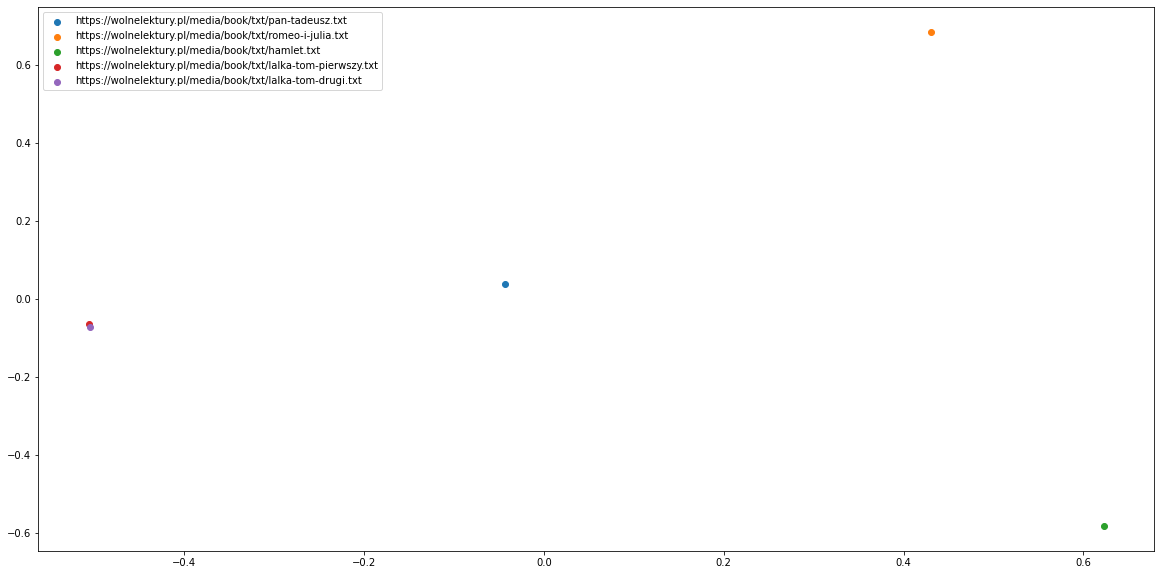

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#n_components - liczba wymiarów
pca = PCA(n_components=2).fit_transform(np.asarray(fit_transform.todense()))

fig = plt.gcf()
for i in range(len(books_links[1:])):
  plt.scatter(pca[i][0], pca[i][1], label=books_links[i+1])
plt.legend()
fig.set_size_inches(20, 10)
plt.show()

Zarówno macierz podobieństw cosinusowych jak i wizualizacja położenia dokumentów w układzie współrzędnych wskazuje duże podobieństwo dwóch tomów Lalki. Na wykresie znacznie dalej od dwóch wystąpień Lalki znajdują się Romeo i Julia oraz Hamlet, niż Pan Tadeusz. Tak samo z podobieństwem cosinusowym (Romeo i Julia + Hamlet, a Lalka - ~0,4, natomiast Pan Tadeusz, a Lalka - ~0,6. Świadczy to o spójności wyników.  